In [1]:
import numpy as np

In [2]:
import os, os.path

folder = '../install/bin/GPUExample2'
files = os.listdir (folder)
files[-5:]

['line95.txt', 'line96.txt', 'line97.txt', 'line98.txt', 'line99.txt']

In [3]:
data = []
for file in files:
    with open (os.path.join (folder, file), 'rt') as f:
        iq_line = []
        for line in f:
            value = np.complex (*[float (x) for x in line.strip ().split (',')])
            iq_line.append (value)
        data.append (np.array (iq_line))
data = np.array (data)
print (data, data.dtype, data.shape)

[[ 1.25170e-06+8.91089e-06j  9.77516e-06-2.98023e-07j
   5.96046e-07-1.03116e-05j ...  4.31709e-07-1.01328e-05j
  -9.17913e-06-2.37992e-07j  8.94561e-07+9.65591e-06j]
 [ 5.06639e-07+1.47820e-05j  1.38283e-05+9.53674e-07j
   5.96046e-08-1.28746e-05j ...  4.76207e-07-1.50204e-05j
  -1.38283e-05+1.19851e-07j -1.78158e-07+1.28746e-05j]
 [-8.94070e-07-1.35899e-05j -1.27256e-05+9.53674e-07j
  -1.19209e-07+1.31726e-05j ... -4.76198e-07+1.52290e-05j
   1.35898e-05-2.39050e-07j -2.39165e-07-1.46627e-05j]
 ...
 [ 0.00000e+00-1.23978e-05j -1.28746e-05+1.43051e-06j
  -4.76837e-07+1.43051e-05j ...  4.77507e-07+1.59740e-05j
   1.57357e-05+7.14525e-07j  4.76212e-07-1.22786e-05j]
 [-9.53674e-07-1.38283e-05j -1.43051e-05-1.43051e-06j
  -2.86102e-06+1.33514e-05j ... -1.42987e-06+1.52588e-05j
   1.57357e-05+1.90662e-06j -1.43119e-06-1.33514e-05j]
 [-5.96046e-07-1.33514e-05j -1.39475e-05+9.53674e-07j
  -1.54972e-06+1.31130e-05j ... -1.42985e-06+1.57357e-05j
   1.31131e-05+1.42990e-06j -7.15899e-07-1.26361

In [4]:
def visualize (iq_lines, title='', equalize=False, min_dB=None, save_path=None, figsize=(12, 6), aspect_ratio='auto', show=True):
    import matplotlib.pyplot as plt
    import numpy as np
    
    num_samples, num_lines = iq_lines.shape
    center_magnitude = abs (iq_lines[:, num_lines//2].real)
    # Detect envelope
    data = abs (iq_lines)
    # Full-scale contrast stretch into range [0, 1]
    low, high = data.min (), data.max ()
    data = (data - low) / (high - low)
    # Histogram equalize
    if equalize:
        hist, bins = np.histogram (abs (data), bins=256)
        cdf = np.cumsum (hist)
        cdf = cdf/cdf[-1]
        data = np.interp (data, bins[:-1], cdf)
    # Log compress into range [min_dB, 0] dB
    if min_dB is not None:
        data = 10 * np.log10(data + 10**(min_dB/10))

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    ax = axes[0]
    plt.sca (ax)
    plt.plot(center_magnitude, color=(153/255,102/255,204/255))
    plt.xlabel ('Depth', fontsize=14, labelpad=15)
    plt.ylabel ('Amplitude', fontsize=14, labelpad=15)
    plt.yticks ([])
    plt.grid ()
    plt.title ('Center RF-Line Magnitude', fontsize=16, pad=15)

    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible (False)

    ax = axes[1]
    plt.sca (ax)
    image = plt.imshow (data, cmap='gray', interpolation='nearest')
    ax.set_aspect (aspect_ratio)
    plt.xlabel ('Width', fontsize=14, labelpad=15)
    plt.ylabel ('Depth', fontsize=14, labelpad=15)
    if title:
        plt.title (title, fontsize=16, pad=15)
    plt.grid ()
    
    plt.tick_params (axis='both', which='both', bottom=True, top=False,
                    labelbottom=True, left=True, right=False, labelleft=True)
    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_visible (False)
    for side in ['bottom', 'left']:
        ax.spines[side].set_position(('outward', 1))
    
    if min_dB is not None:
        cbar = fig.colorbar (image)
        cbar.set_label ('(dB)', fontsize=12)

    if save_path:
        plt.savefig(save_path)
        print('Image written to disk at:\n{}'.format (save_path))
    
    if show:
        plt.show ()
    else:
        return fig, axes

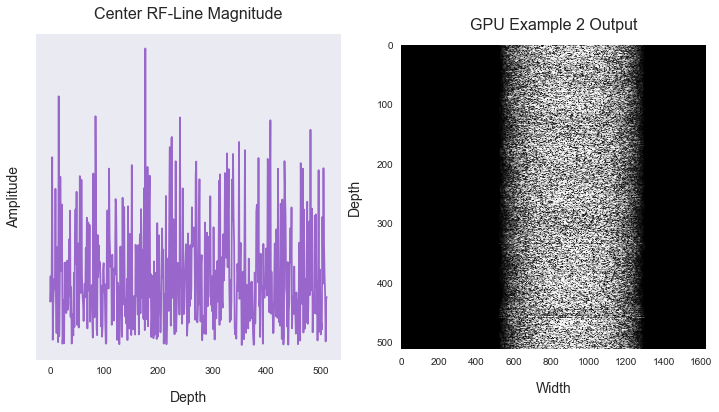

In [6]:
import matplotlib.pyplot as plt

ratio = data.shape[1]/data.shape[0]
# visualize (data, 'GPU Example 2 Output', save_path='../figures/gpu_example2.output.png', aspect_ratio=ratio, equalize=1)
visualize (data, 'GPU Example 2 Output', aspect_ratio=ratio, equalize=1)
# visualize (data, 'GPU Example 2 Output', aspect_ratio=ratio, min_dB=-30)
# visualize (data, 'GPU Example 2 Output', aspect_ratio=ratio)